Data preprocessing completed successfully.
Use /var/folders/x4/wn15gjfj3sqb0p189fyr3z940000gn/T/tmpsw7jdujv as temporary training directory
Reading training dataset...
Training dataset read in 0:00:02.639807. Found 3521 examples.
Training model...
Model trained in 0:00:00.200819
Compiling model...


I0000 00:00:1744198463.259147  338662 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1744198463.259410  338662 kernel.cc:783] Collect training examples
I0000 00:00:1744198463.259444  338662 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1744198463.259969  338662 kernel.cc:401] Number of batches: 4
I0000 00:00:1744198463.259979  338662 kernel.cc:402] Number of examples: 3521
I0000 00:00:1744198463.260426  338662 kernel.cc:802] Training dataset:
Number of records: 3521
Number of columns: 9

Number of columns by type:
	NUMERICAL: 8 (88.8889%)
	CATEGORICAL: 1 (11.1111%)

Columns:

NUMERICAL: 8 (88.8889%)
	1: "external_count" NUMERICA

Model compiled.
28/28 [==============================] - 0s 899us/step

Confusion Matrix:
                Pred False  Pred True
Actually False         425         25
Actually True           47        384


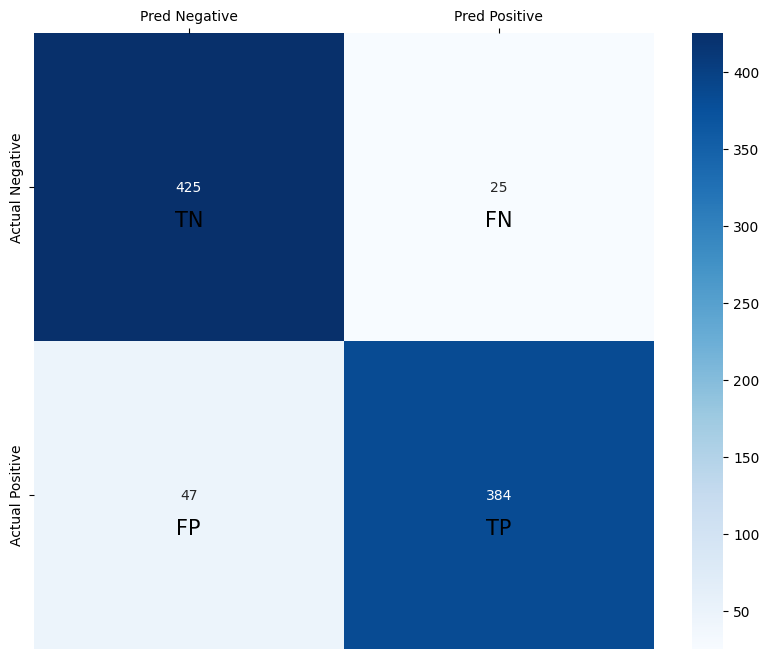


Evaluation Results:
{'accuracy': 0.9182746878547106, 'precision': 0.9388753056234719, 'recall': 0.8909512761020881, 'F1': 0.9142857142857143, 'log_loss': 0.28187233600874984}

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       450
           1       0.94      0.89      0.91       431

    accuracy                           0.92       881
   macro avg       0.92      0.92      0.92       881
weighted avg       0.92      0.92      0.92       881

Available variable importances types: dict_keys(['INV_MEAN_MIN_DEPTH', 'SUM_SCORE', 'NUM_AS_ROOT', 'NUM_NODES'])

Importance type: INV_MEAN_MIN_DEPTH


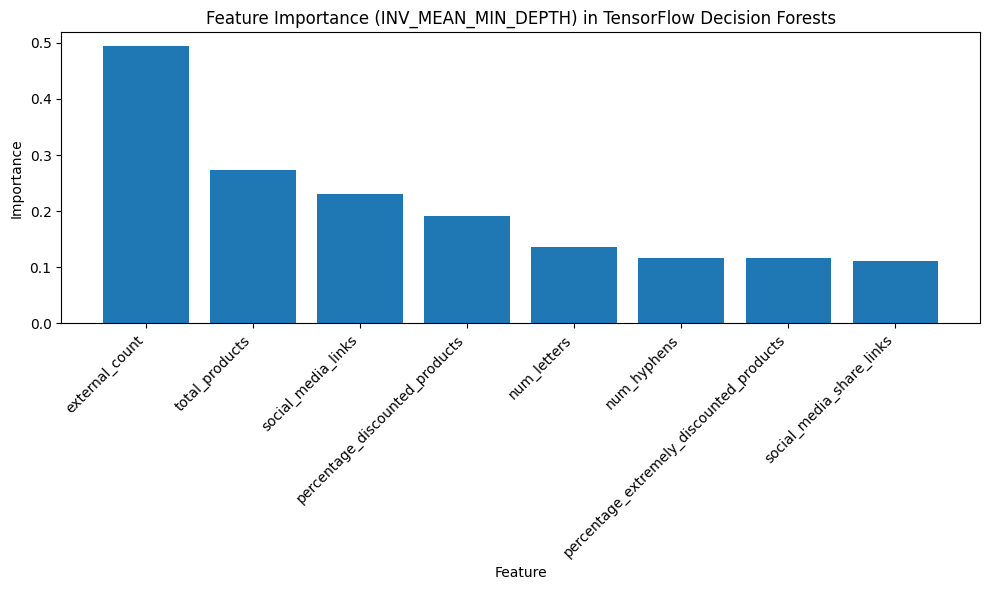


Importance type: SUM_SCORE


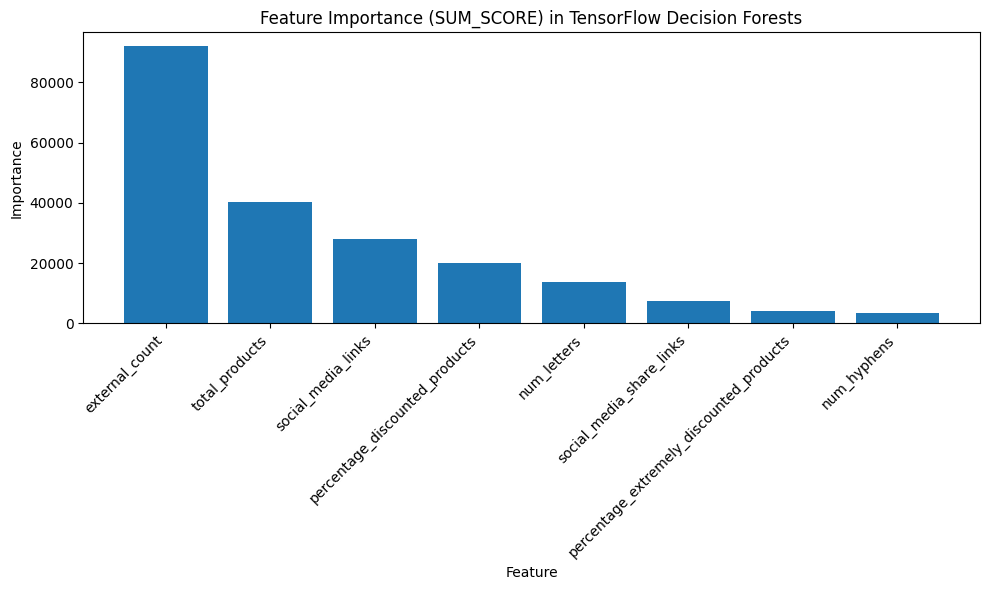


Importance type: NUM_AS_ROOT


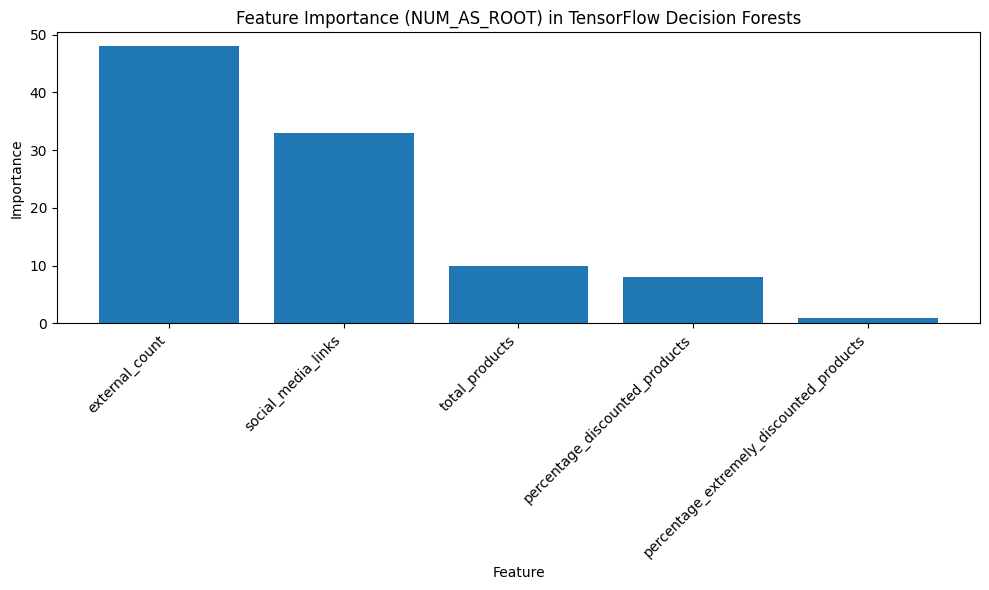


Importance type: NUM_NODES


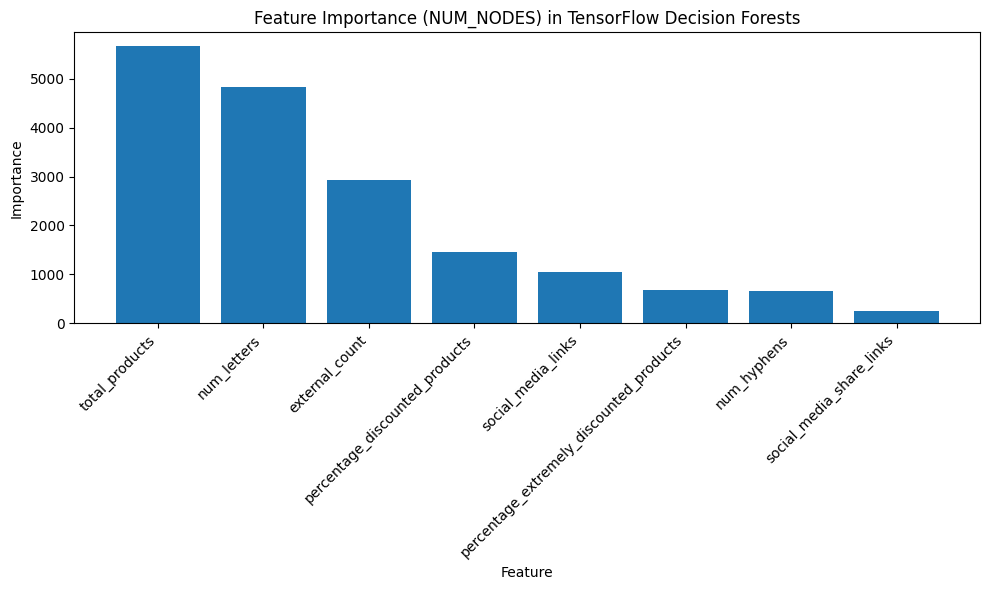


Feature Importances (INV_MEAN_MIN_DEPTH):
                                    feature  importance
0                            external_count    0.494066
1                            total_products    0.272977
2                        social_media_links    0.230865
3            percentage_discounted_products    0.191056
4                               num_letters    0.135152
5                               num_hyphens    0.116953
6  percentage_extremely_discounted_products    0.116690
7                  social_media_share_links    0.111915

Feature Importances (SUM_SCORE):
                                    feature    importance
0                            external_count  91988.184841
1                            total_products  40422.574815
2                        social_media_links  28041.962047
3            percentage_discounted_products  20089.200748
4                               num_letters  13818.563729
5                  social_media_share_links   7294.412885
6  percentage

INFO:tensorflow:Assets written to: ./saved_model/assets
I0000 00:00:1744198466.111325  339402 decision_forest.cc:761] Model loaded with 100 root(s), 35200 node(s), and 8 input feature(s).
I0000 00:00:1744198466.121570  338662 devices.cc:76] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
I0000 00:00:1744198466.122087  338662 single_machine.cc:361] Starting new session


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
I0000 00:00:1744198466.222764  338662 devices.cc:76] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
I0000 00:00:1744198466.222839  338662 single_machine.cc:361] Starting new session


weight StatefulPartitionedCall/random_forest_model/StatefulPartitionedCall/RaggedConstant/Const with shape (1,) and dtype int64 was auto converted to the type int32
weight StatefulPartitionedCall/random_forest_model/StatefulPartitionedCall/RaggedConstant/Const_1 with shape (1,) and dtype int64 was auto converted to the type int32


In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import get_shop_data, extract_features_and_labels, shuffle_dataset, split_dataset, convert_to_tf_dataset, extract_labels_true_predict, save_to_csv
import tensorflowjs as tfjs



# Train a TensorFlow Decision Forest Random Forest Model
def train_model(train_ds, test_ds):
   
    # Initialize the Random Forest Classifier using TensorFlow Decision Forests
    rf_model = tfdf.keras.RandomForestModel(num_trees=100, random_seed=42)

    # Train the model on the training dataset   
    rf_model.fit(train_ds)


    return rf_model


# Feature importance visualization
def get_feature_importance(rf_model: tfdf.keras.RandomForestModel):

    # Get the model inspector
    inspector = rf_model.make_inspector()

    # List available variables importances types
    available_importances_types = inspector.variable_importances().keys()
    print("Available variable importances types:", available_importances_types)

    # Initialize a dictionary to store feature importances for each type
    feature_importances_dict = {}

    # Iterate over each importance type
    for importance_type in available_importances_types:
        print(f"\nImportance type: {importance_type}")
        importances = inspector.variable_importances()[importance_type]

       # Extract feature names and importances
        feature_names = [vi[0].name for vi in importances]
        feature_importances = [vi[1] for vi in importances]

        # Creates a Pandas DataFrame to store feature names and their importance scores
        feature_importances_df = pd.DataFrame({
            "feature": feature_names,
            "importance": feature_importances
        }).sort_values(by="importance", ascending=False)

        # Store the feature importances for each type in a dictionary
        feature_importances_dict[importance_type] = feature_importances_df
        
        # Plot feature importance
        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance ({importance_type}) in TensorFlow Decision Forests')
        plt.bar(feature_importances_df['feature'], feature_importances_df['importance'])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.xticks(ticks=np.arange(len(feature_importances_df['feature'])), labels=feature_importances_df['feature'], rotation=45, ha='right')        
        plt.tight_layout()
        plt.show()

    # Return or store the feature importances for each type
    return feature_importances_dict

# Main execution
if __name__ == "__main__":
    # Load and clean shop data
    shop_df_cleaned = get_shop_data()
    
    # Start timing before training
    start_time = time.time()
    
    if shop_df_cleaned is not None:
        # Save original data with URLs for reference
        save_to_csv(shop_df_cleaned, "./shop_data/shop_data_analysis_with_url.csv")

        # Drop unnecessary columns for modeling
        shop_df_cleaned = shop_df_cleaned.drop(columns=["urls", "domain"], errors="ignore")

        # Save unscaled data without URLs
        save_to_csv(shop_df_cleaned, "./shop_data/shop_data_analysis_unscaled.csv")

        # Extract features and labels data for model training
        features, labels = extract_features_and_labels(shop_df_cleaned)

        print("Data preprocessing completed successfully.")

        # Shuffle the dataset
        features_shuffled, labels_shuffled = shuffle_dataset(features, labels)

        features_train, features_test, labels_train, labels_test = split_dataset(features_shuffled, labels_shuffled)
        train_tf_dataset = convert_to_tf_dataset(features_train, labels_train)
        test_tf_dataset = convert_to_tf_dataset(features_test, labels_test)


        # Train model
        rf_model = train_model(train_tf_dataset, test_tf_dataset)


        # Evaluate model

        ## Unbatch test dataset to ensure consistency
        test_tf_dataset_unbatched = test_tf_dataset.unbatch()

        ## Get true labels and features 
        labels_true, labels_pred_proba, labels_pred_classes = extract_labels_true_predict(test_tf_dataset_unbatched, rf_model)

        ## Generate confusion matrix for test dataset
        conf_matrix = confusion_matrix(labels_true, labels_pred_classes)

        ## Print confusion matrix DataFrame
        conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actually False", "Actually True"], columns=["Pred False", "Pred True"]) 
        print("\nConfusion Matrix:")
        print(conf_matrix_df)

        ## Plot the confusion matrix
        plt.figure(figsize=(10,8))
        ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')  # Create a heatmap

        ## Set custom x and y tick labels
        ax.set_xticks([0.5, 1.5])  # Adjust tick positions to align with cell centers
        ax.set_xticklabels(['Pred Negative', 'Pred Positive'], ha='center')  # Center-align labels
        ax.set_yticks([0.5, 1.5])  # Adjust tick positions to align with cell centers
        ax.set_yticklabels(['Actual Negative', 'Actual Positive'], va='center')  # Center-align labels
        ax.xaxis.tick_top()  # Move x-axis labels to the top

        ## Add custom annotations for TP, FP, TN, FN
        for i, row in enumerate(conf_matrix):
            for j, val in enumerate(row):
                if i == 0 and j == 0:
                    plt.text(j + 0.5, i + 0.5, f'\nTN', ha='center', va='top', fontsize=15)
                elif i == 0 and j == 1:
                    plt.text(j + 0.5, i + 0.5, f'\nFN', ha='center', va='top', fontsize=15)
                elif i == 1 and j == 0:
                    plt.text(j + 0.5, i + 0.5, f'\nFP', ha='center', va='top', fontsize=15)
                elif i == 1 and j == 1:
                    plt.text(j + 0.5, i + 0.5, f'\nTP', ha='center', va='top', fontsize=15)

        plt.xlabel("")
        plt.ylabel("")
        plt.show()

        ## Calculate accuracy, precision, recall, and F1 score
        evaluation = {
        'accuracy': accuracy_score(labels_true, labels_pred_classes),
        'precision': precision_score(labels_true, labels_pred_classes),
         'recall': recall_score(labels_true, labels_pred_classes),
         'F1': f1_score(labels_true, labels_pred_classes),
         'log_loss': log_loss(labels_true, labels_pred_proba)
        }
        print("\nEvaluation Results:")
        print(evaluation)

        ## Generate classification report
        report = classification_report(labels_true, labels_pred_classes)
        print("\nClassification Report:")
        print(report)

        ## Get and print feature importance
        feature_importances_dict = get_feature_importance(rf_model)
        for importance_type in feature_importances_dict:
            df = feature_importances_dict[importance_type]
            print(f"\nFeature Importances ({importance_type}):")
            print(df)

        # End timing after training
        end_time = time.time()

        # Calculate training time
        training_time = end_time - start_time

        print(f"\nTraining and evaluation time: {training_time} seconds")


        ## Print the sizes of train_tf_dataset and test_tf_dataset before training.
        print("\nSizes of train_tf_dataset and test_tf_dataset before training:")
        print("Number of samples in unbatched train dataset:", len(list(train_tf_dataset.unbatch())))
        print("Number of samples in unbatched test dataset:", len(list(test_tf_dataset.unbatch())))
        print("Number of true labels:", len(labels_true))
        print("Number of predicted labels:", len(labels_pred_classes))

        # Save the model in the TensorFlow SavedModel format
        tf.saved_model.save(rf_model, "./saved_model")

        # Convert the model to TensorFlow.js format
        #tfjs.converters.convert_tf_saved_model(
        #    saved_model_dir='./saved_model',
        #    output_dir='./tfjs_model',
        #    skip_op_check=True
        #)

        tfjs.converters.tf_saved_model_conversion_v2.convert_tf_saved_model("./saved_model", "./tfjs_model")

